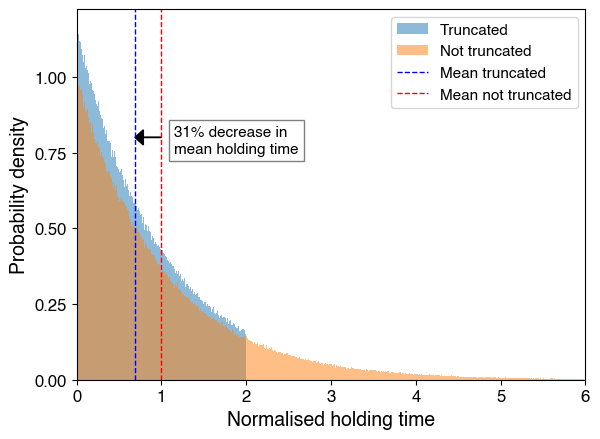

In [2]:
# To find the effect of truncating the holding time ot be less than 2*mean
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set up Helvetica font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif']
plt.rcParams.update({'font.size': 20})

def deeprmsa_sample(mean):
    holding_time = np.random.exponential(mean)
    while holding_time > 2*mean:
        holding_time = np.random.exponential(mean)
    return holding_time

# plot the distribution of holding times
mean = 25
n_samples = 1000000
deeprmsa = np.array([deeprmsa_sample(mean) for i in range(n_samples)])
rmsa = np.array([np.random.exponential(mean) for i in range(n_samples)])
max_ht = mean#max(max(deeprmsa), max(rmsa))
deeprmsa_norm = deeprmsa/max_ht
rmsa_norm = rmsa/max_ht
mean_ht_truncated = np.mean(deeprmsa_norm)
mean_ht = np.mean(rmsa_norm)
bins = np.arange(0, 10.01, 0.01)
# sort into bins
plt.hist(deeprmsa_norm, bins=bins, label="Truncated", alpha=0.5, density=True)
plt.hist(rmsa_norm, bins=bins, label="Not truncated", alpha=0.5, density=True)
plt.axvline(mean_ht_truncated, color='b', linestyle='dashed', linewidth=1, label="Mean truncated")
plt.axvline(mean_ht, color='r', linestyle='dashed', linewidth=1, label="Mean not truncated")
# Legend with 12 text size
plt.legend(fontsize=11)
plt.xlabel("Normalised holding time", size=14)
plt.ylabel("Probability density", size=14)
plt.xlim([0,6])
# Make x and y ticks larger
plt.xticks(size=12)
plt.yticks(size=12)
# Add a box saying the ratio of the means
# Draw an arrow pointing from mean_ht to mean_ht_truncated
plt.arrow(mean_ht, 0.8, -mean_ht+mean_ht_truncated, 0, head_width=0.05, head_length=0.1, fc='k', ec='k', length_includes_head=True)
plt.text(mean_ht+0.15, 0.75, f"{int(((mean_ht-mean_ht_truncated) / mean_ht)*100)}% decrease in\nmean holding time", bbox=dict(facecolor='white', alpha=0.5), size=11)
plt.tight_layout()
plt.savefig("truncation.png")
plt.show()